## Libraries

In [1]:
import pandas as pd
import time 

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pprint

from bs4 import BeautifulSoup
import re #regex
import requests
from requests.exceptions import ReadTimeout
import random
import numpy as np
from tqdm.notebook import tqdm

## Web scrap billboard

In [2]:
# 2. find url and store it in avariable
url = "https://www.billboard.com/charts/hot-100/"

# 3. download html with a get request
response = requests.get(url)

#check response status code 
response.status_code

200

In [3]:
#parse and store the contents of the url call
soup=BeautifulSoup(response.content,'html.parser')

In [4]:
#prettify the soup 
# print(soup.prettify())

In [5]:
# getting the song name
soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

'Easy On Me'

In [6]:
# getting the artist name
soup.select('span.c-label.a-font-primary-s')[0].get_text(strip=True)

'Adele'

In [7]:
song = []
artist = []

len_songs = len(soup.select('h3.c-title.a-no-trucate'))
len_songs

100

In [8]:
for i in tqdm(range(len_songs)):
    song.append(soup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artist.append(soup.select('span.c-label.a-font-primary-s')[i].get_text(strip=True))

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
billboard_top100 = pd.DataFrame({'song':song,'artist':artist})

In [10]:
billboard_top100.head()

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele


In [12]:
check_df = billboard_top100.applymap(lambda s:s.lower() if type(s) == str else s)
check_df = check_df.applymap(lambda s:s.replace(" ", '') if type(s) == str else s)

In [13]:
check_df

,song,artist
0,easyonme,adele
1,stay,thekidlaroi&justinbieber
2,industrybaby,lilnasx&jackharlow
3,alltoowell(taylor'sversion),taylorswift
4,ohmygod,adele
...,...,...
95,tooeasy,gunna&future
96,escapeplan,travisscott
97,who'sinyourhead,jonasbrothers
98,jugasteysufri,eslabonarmadofeaturingdannylux


In [14]:
#store it in a csv
# billboard_top100.to_csv(r'billboard_top100.csv', index = False, header = True)

## Query the soup

## GetPass

In [15]:
client_id = str(getpass.getpass('client_id: '))

client_id: ········


In [16]:
client_secret = str(getpass.getpass('client_secret: '))

client_secret: ········


In [17]:
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

## Get the data from a whole playlist

In [18]:
# function which handlees more than 100 results

def get_playlist_tracks(user_id,playlist_id):
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [19]:
results2 = get_playlist_tracks("Klaus Tienaho","3PlzvUAGHzXYS4m5fOkuHP")
results2

[{'added_at': '2010-08-19T21:51:01Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5M52tdBnJaKSvOpJGz8mfZ'},
      'href': 'https://api.spotify.com/v1/artists/5M52tdBnJaKSvOpJGz8mfZ',
      'id': '5M52tdBnJaKSvOpJGz8mfZ',
      'name': 'Black Sabbath',
      'type': 'artist',
      'uri': 'spotify:artist:5M52tdBnJaKSvOpJGz8mfZ'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/714ndVxSx8lIWhQxdbcXIs'},
    'href': 'https://api.spotify.com/v1/albums/714ndVxSx8lIWhQxdbcXIs',
    'id': '714ndVxSx8lIWhQxdbcXIs',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273cfa6ec6d5374ce8aec1a73f5',
      'width': 

In [20]:
len(results2)

497

## Iterate over the tracks of a playlist to collect the song name, song URI/ID and the artist

In [21]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results2

for r in results2:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf2 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf2['song_name'] = songdf2['song_name'].str.lower()
songdf2['artist'] = songdf2['artist'].str.lower()
songdf2

,song_name,song_id,artist
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath
1,ace of spades,47FyQCd3TYLrZ9TU6MPaWK,motörhead
2,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne
3,the number of the beast - 1998 remastered version,1s4Ie0cT6P73SRSfh3oyGW,iron maiden
4,hallowed be thy name - 1998 remastered version,1iGXvUsVVkYBas0Cniw6NB,iron maiden
...,...,...,...
492,gangland,1alav0oB46PY36eKNN6e3X,tygers of pan tang
493,trial by fire,4NKqJMlONXzac3DEmh5iwp,testament
494,whiplash (remastered),4k1IS2uF2dGcU3GzOOZqqb,metallica
495,rock of ages,06VOoCjZ6OfCbOKVIhCIT9,def leppard


## Get the audio features

In [22]:
feats=sp.audio_features(tracks=song_id[0:99])

In [23]:
feats[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [24]:
audio_feat_df1=pd.DataFrame(sp.audio_features(tracks=song_id[0:100]))
audio_feat_df2=pd.DataFrame(sp.audio_features(tracks=song_id[100:200]))
audio_feat_df3=pd.DataFrame(sp.audio_features(tracks=song_id[200:300]))
audio_feat_df4=pd.DataFrame(sp.audio_features(tracks=song_id[300:400]))
audio_feat_df5=pd.DataFrame(sp.audio_features(tracks=song_id[400:500]))

In [25]:
audio_feat_df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.311,0.806,4,-12.337,1,0.0499,0.091900,0.003670,0.1410,0.0772,135.121,audio_features,1n5tv95U5Ixc9kEki1C5MA,spotify:track:1n5tv95U5Ixc9kEki1C5MA,https://api.spotify.com/v1/tracks/1n5tv95U5Ixc...,https://api.spotify.com/v1/audio-analysis/1n5t...,639867,4
1,0.478,0.937,0,-6.173,0,0.1060,0.007710,0.018100,0.8400,0.2940,131.418,audio_features,1EORu8Coheibl21VjHtbRg,spotify:track:1EORu8Coheibl21VjHtbRg,https://api.spotify.com/v1/tracks/1EORu8Coheib...,https://api.spotify.com/v1/audio-analysis/1EOR...,298401,4
2,0.475,0.576,9,-13.059,1,0.0312,0.021800,0.022100,0.3910,0.5240,96.378,audio_features,25suYHVUwWFTG6G31kuhZH,spotify:track:25suYHVUwWFTG6G31kuhZH,https://api.spotify.com/v1/tracks/25suYHVUwWFT...,https://api.spotify.com/v1/audio-analysis/25su...,397773,4
3,0.448,0.833,6,-8.582,1,0.0432,0.004270,0.000703,0.2310,0.5920,116.676,audio_features,2VVat48YTOk3wALkMjNxvQ,spotify:track:2VVat48YTOk3wALkMjNxvQ,https://api.spotify.com/v1/tracks/2VVat48YTOk3...,https://api.spotify.com/v1/audio-analysis/2VVa...,327400,4
4,0.457,0.779,7,-6.323,1,0.2570,0.018500,0.000002,0.0247,0.7340,86.573,audio_features,0N4NO2BmOIBWrCQ9r8Ei8m,spotify:track:0N4NO2BmOIBWrCQ9r8Ei8m,https://api.spotify.com/v1/tracks/0N4NO2BmOIBW...,https://api.spotify.com/v1/audio-analysis/0N4N...,313667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.416,0.792,6,-11.885,1,0.0604,0.003520,0.105000,0.4020,0.5200,104.708,audio_features,1bWe6OdgzmJrXLsJN2HDXx,spotify:track:1bWe6OdgzmJrXLsJN2HDXx,https://api.spotify.com/v1/tracks/1bWe6OdgzmJr...,https://api.spotify.com/v1/audio-analysis/1bWe...,211733,4
96,0.397,0.969,9,-3.892,1,0.0463,0.000002,0.517000,0.0513,0.7020,134.288,audio_features,2nWjhmRImt6LScZIPQMBnM,spotify:track:2nWjhmRImt6LScZIPQMBnM,https://api.spotify.com/v1/tracks/2nWjhmRImt6L...,https://api.spotify.com/v1/audio-analysis/2nWj...,218293,4
97,0.346,0.765,8,-8.558,1,0.0413,0.002290,0.000008,0.2130,0.6440,106.463,audio_features,3G0EKJZy0j3rMG077UawaC,spotify:track:3G0EKJZy0j3rMG077UawaC,https://api.spotify.com/v1/tracks/3G0EKJZy0j3r...,https://api.spotify.com/v1/audio-analysis/3G0E...,284427,4
98,0.493,0.938,4,-7.221,0,0.0819,0.000023,0.015900,0.1210,0.7070,94.655,audio_features,1Iw3wchVrb4rahrtYqcdW6,spotify:track:1Iw3wchVrb4rahrtYqcdW6,https://api.spotify.com/v1/tracks/1Iw3wchVrb4r...,https://api.spotify.com/v1/audio-analysis/1Iw3...,146173,4


In [26]:
frames = [audio_feat_df1, audio_feat_df2,audio_feat_df3, audio_feat_df4,audio_feat_df5]
result = pd.concat(frames)
result.reset_index(drop=True, inplace=True)
result

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.00113,0.1730,0.379,162.663,audio_features,3L8WgDYS5TtwbyxOPSAiFf,spotify:track:3L8WgDYS5TtwbyxOPSAiFf,https://api.spotify.com/v1/tracks/3L8WgDYS5Ttw...,https://api.spotify.com/v1/audio-analysis/3L8W...,167933,4
1,0.324,0.991,6,-4.465,1,0.1970,0.002470,0.00895,0.1040,0.195,140.245,audio_features,47FyQCd3TYLrZ9TU6MPaWK,spotify:track:47FyQCd3TYLrZ9TU6MPaWK,https://api.spotify.com/v1/tracks/47FyQCd3TYLr...,https://api.spotify.com/v1/audio-analysis/47Fy...,166707,4
2,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.00248,0.3270,0.586,137.606,audio_features,3ao8tE7CIEo3KehDQYYoWv,spotify:track:3ao8tE7CIEo3KehDQYYoWv,https://api.spotify.com/v1/tracks/3ao8tE7CIEo3...,https://api.spotify.com/v1/audio-analysis/3ao8...,290067,4
3,0.420,0.930,2,-5.583,0,0.0638,0.018900,0.00675,0.2640,0.344,99.641,audio_features,1s4Ie0cT6P73SRSfh3oyGW,spotify:track:1s4Ie0cT6P73SRSfh3oyGW,https://api.spotify.com/v1/tracks/1s4Ie0cT6P73...,https://api.spotify.com/v1/audio-analysis/1s4I...,291373,4
4,0.304,0.909,9,-5.162,1,0.0362,0.001850,0.12200,0.3620,0.348,103.990,audio_features,1iGXvUsVVkYBas0Cniw6NB,spotify:track:1iGXvUsVVkYBas0Cniw6NB,https://api.spotify.com/v1/tracks/1iGXvUsVVkYB...,https://api.spotify.com/v1/audio-analysis/1iGX...,432800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.297,0.991,7,-2.365,1,0.2430,0.000106,0.00122,0.2730,0.189,116.428,audio_features,1alav0oB46PY36eKNN6e3X,spotify:track:1alav0oB46PY36eKNN6e3X,https://api.spotify.com/v1/tracks/1alav0oB46PY...,https://api.spotify.com/v1/audio-analysis/1ala...,220627,4
493,0.331,0.791,1,-11.187,1,0.0425,0.000257,0.42600,0.2100,0.309,94.907,audio_features,4NKqJMlONXzac3DEmh5iwp,spotify:track:4NKqJMlONXzac3DEmh5iwp,https://api.spotify.com/v1/tracks/4NKqJMlONXza...,https://api.spotify.com/v1/audio-analysis/4NKq...,255360,4
494,0.386,0.911,4,-6.474,0,0.0956,0.000608,0.44300,0.1350,0.188,158.045,audio_features,4k1IS2uF2dGcU3GzOOZqqb,spotify:track:4k1IS2uF2dGcU3GzOOZqqb,https://api.spotify.com/v1/tracks/4k1IS2uF2dGc...,https://api.spotify.com/v1/audio-analysis/4k1I...,248547,4
495,0.710,0.806,11,-7.660,0,0.0447,0.009470,0.08950,0.1800,0.621,105.866,audio_features,06VOoCjZ6OfCbOKVIhCIT9,spotify:track:06VOoCjZ6OfCbOKVIhCIT9,https://api.spotify.com/v1/tracks/06VOoCjZ6OfC...,https://api.spotify.com/v1/audio-analysis/06VO...,247829,4


## Add more songs

- [80s Heavy Metal](https://open.spotify.com/playlist/7bcOsrWwa5jASp5zwr6RXD)
- by Kjetil Myhre
- 106 songs

In [27]:
results3 = get_playlist_tracks("Kjetil Myhre","7bcOsrWwa5jASp5zwr6RXD")
len(results3)

106

In [28]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results3

for r in results3:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf3 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf3['song_name'] = songdf3['song_name'].str.lower()
songdf3['artist'] = songdf3['artist'].str.lower()
songdf3

,song_name,song_id,artist
0,rainbow in the dark,4Ld00UQYL3aPcK4yOnv0JP,dio
1,"girls, girls, girls",5Rso4igx5lTkTAbDEN9nuQ,mötley crüe
2,red alert,72GcnatH6Q1IqRrNjOuukN,quiet riot
3,poison,5XcZRgJv3zMhTqCyESjQrF,alice cooper
4,people of the night,6K4fiQRAp9QdwDdK5DKHcl,shout
...,...,...,...
101,rock her bones,02m82m2wWh1dzfmkL5mDlX,shout
102,come out and play,3SPJpKR25VMjWwIo2JCL6k,twisted sister
103,seven seas,0vkP5rs4NqGdEW10oHstO8,tnt
104,rock me - 2005 remaster,5RK9Q1vogXWI60qVGDzTZA,great white


-----

- [Heavy Metal-80's Hair Metal-Power Ballads-Rock](https://open.spotify.com/playlist/1tvCfaqcXP2QEHgFWf0t17?si=02bcc9709c514252&nd=1)
- by Solveig Seldal
- 785 songs

In [29]:
results4 = get_playlist_tracks("Solveig Seldal","1tvCfaqcXP2QEHgFWf0t17")
len(results4)

785

In [30]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results4

for r in results4:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf4 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf4['song_name'] = songdf4['song_name'].str.lower()
songdf4['artist'] = songdf4['artist'].str.lower()
songdf4

,song_name,song_id,artist
0,rock you like a hurricane,46QazXxQS0B31CnbRCy8CV,scorpions
1,cartesian dreams,26QQFxxg7EkPLwfAc2qCpy,house of lords
2,i walk alone,5m8JHIXmasB1qOPCzfGVBr,jorn
3,she's gone,2fvObZjCzCF57MKmn1ePPO,steelheart
4,slow an' easy,0qTvq8jgrRd2mu3Q7d4oQb,whitesnake
...,...,...,...
780,bring me everyone,148V2ZB9jpUeJENStJjjDq,mustasch
781,the skeleton key,6IVKiq8Xxhvg03MUtu5smv,epica
782,head up high,0uRUJf3fZDrTGM9JksGZuZ,firewind
783,lost chapter,207K1MXwebxpXDS43OazOU,pentakill


-----

- [80's,rock,heavy metal and metal mix](https://open.spotify.com/playlist/2Rhu5twFe7cNUlRtadJtnw?si=91332b798c8045ca&nd=1)
- by Nicholas Kauffmann
- 668 songs

In [31]:
results5 = get_playlist_tracks("Nicholas Kauffmann","2Rhu5twFe7cNUlRtadJtnw")
len(results5)

668

In [32]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results5

for r in results5:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf5 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf5['song_name'] = songdf5['song_name'].str.lower()
songdf5['artist'] = songdf5['artist'].str.lower()
songdf5

,song_name,song_id,artist
0,paranoid,3q9G9SvgdfE1fxlvoDIb20,black sabbath
1,kickstart my heart,7GonnnalI2s19OCQO1J7Tf,mötley crüe
2,bringin' on the heartbreak,5DKSOabxbMTF1oLdPp5bcs,def leppard
3,over the mountain,0i1RTnH2Lj5gTDRU5wtyT2,ozzy osbourne
4,am i evil?,03pJkRoQU8Lrmgc14ffJGJ,metallica
...,...,...,...
663,rock me,0u6toDywZABXlUBq76iPKW,great white
664,find your way back,1QlHzR2Nl7gJlb4n3OrtrV,jefferson starship
665,jane,2RNd6VgxG19db0zs0M1C4Z,jefferson starship
666,no way out,5ncLNCx0nnz763Aug1q4ay,jefferson starship


-----

- [Heavy Metal Classics](https://open.spotify.com/playlist/27gN69ebwiJRtXEboL12Ih?si=13cc331c40b04ae0&nd=1)
- by Misi
- 386 songs

In [33]:
results6 = get_playlist_tracks("Misi","27gN69ebwiJRtXEboL12Ih")
len(results6)

386

In [34]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results6

for r in results6:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf6 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf6['song_name'] = songdf6['song_name'].str.lower()
songdf6['artist'] = songdf6['artist'].str.lower()
songdf6

,song_name,song_id,artist
0,paranoid,3q9G9SvgdfE1fxlvoDIb20,black sabbath
1,the trooper - 2015 remaster,4OROzZUy6gOWN4UGQVaZMF,iron maiden
2,ace of spades,47FyQCd3TYLrZ9TU6MPaWK,motörhead
3,run to the hills - 2015 remaster,4Zc7TCHzuNwL0AFBlyLdyr,iron maiden
4,fear of the dark - 2015 remaster,6p8eFfPw3nQkf37aT3AkmK,iron maiden
...,...,...,...
381,over my head,54XuDwn7kL2PXGw6vUW6Hx,king's x
382,wait and bleed,15DLl1r2zi07Ssq5RT1yT0,slipknot
383,powertrip,3azSRGmcZSaSZVV3Izg4Tg,monster magnet
384,astronomy,67TDP21NkdDbavSA0sMk8v,blue öyster cult


-----

- [80s Heavy Rock / Metal](https://open.spotify.com/playlist/0EPz7rNCG4jjzgHpxdM1nD?si=2acca1ad7dca4c6a&nd=1)
- by rol-ba
- 243 songs

In [35]:
results7 = get_playlist_tracks("rol-ba","0EPz7rNCG4jjzgHpxdM1nD")
len(results7)

243

In [36]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results7

for r in results7:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf7 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf7['song_name'] = songdf7['song_name'].str.lower()
songdf7['artist'] = songdf7['artist'].str.lower()
songdf7

,song_name,song_id,artist
0,breaking the law,2RaA6kIcvomt77qlIgGhCT,judas priest
1,ace of spades,6EPRKhUOdiFSQwGBRBbvsZ,motörhead
2,cum on feel the noize,3vV3cr2TpPqFk07zxYUbla,quiet riot
3,holy diver,54yLLvpezvPO1lA3GspiZj,dio
4,run to the hills - 1998 remastered version,2JS1iE5A5RHvUPH5Zl9jlF,iron maiden
...,...,...,...
238,black metal,3yNoEJifUJdly8ucYoWRwl,venom
239,evil,6LGoJAyN1xAqF3VJZt0MKx,mercyful fate
240,metal church,34LXW73avo8xz0NLiVuiow,metal church
241,rock you like a hurricane,58XWGx7KNNkKneHdprcprX,scorpions


-----

- [80s Hard Rock / Heavy Metal](https://open.spotify.com/playlist/0iNXcT6n7EHngUO3JpaW6J?si=4d69f6297b8144c8&nd=1)
- by Rolando Batista
- 547 songs

In [37]:
results8 = get_playlist_tracks("Rolando Batista","0iNXcT6n7EHngUO3JpaW6J")
len(results8)

547

In [38]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results8

for r in results8:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf8 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf8['song_name'] = songdf8['song_name'].str.lower()
songdf8['artist'] = songdf8['artist'].str.lower()
songdf8

,song_name,song_id,artist
0,rock you like a hurricane,0XIvZ82aDF7JiSi3ZE320u,scorpions
1,sweet child o' mine,4MhTFsyqIJnjsOweVcU8ug,guns n' roses
2,summertime girls - studio version,2kR3B09M6KeJnchOkxwszt,y&t
3,jump,2PfBSkCKZDXMsJogMT0wML,van halen
4,rock the night,4NffXDmI70vw19P5Efoe0T,europe
...,...,...,...
542,ingrown,1KTQLypZn07OlnGT38efvU,neurosis
543,united sheep,6QA6acjmIhVnep0WrinGaV,neurosis
544,dominoes fall,33S9AsrE3wmDzDwoQOzOS1,neurosis
545,life on your knees,1cnANrdgRpq8IwfS2tBm61,neurosis


-------

- ['80s Metal Classics](https://open.spotify.com/playlist/3KkzYovFLMOiaXrt72xY2d?si=038511fa54a1461c&nd=1)
- by Gonzalo Andres Quintana
- 336 songs

In [39]:
results9 = get_playlist_tracks("Gonzalo Andres Quintana","3KkzYovFLMOiaXrt72xY2d")
len(results9)

336

In [40]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results9

for r in results9:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf9 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf9['song_name'] = songdf9['song_name'].str.lower()
songdf9['artist'] = songdf9['artist'].str.lower()
songdf9

,song_name,song_id,artist
0,metal gods,0VFfZVCFNe1I2IIChVBR5m,judas priest
1,one,64Ret7Tf2M8pDE4aqbW2tX,metallica
2,we rock,5qo8HipgkkuQ9tItiBiTaO,dio
3,riding the storm,4hfpMRkHOW3xGt8zE8ogFk,running wild
4,wasted years - 2015 remaster,1HM7Vp84E4SMzdrZONg6bH,iron maiden
...,...,...,...
331,soldier of fortune,6WkCJYM3wtIOZvskzHWYnt,loudness
332,the burning of atlanta,16sznMthzmElmJ4fPFP1aL,whiplash
333,power thrashing death,7x0eznaiq2CaLUfOqiUSvt,whiplash
334,the apparition,3KhTOoJDjpFhcAKUAbMxIB,fates warning


------

- [80s Heavy Metal / Underrated playlist](https://open.spotify.com/playlist/41bkoMrOtBPKTIldGrgTGT?si=c96c2e3f5a654db7&nd=1)
- by ocnarf_
- 606 songs


In [41]:
results10 = get_playlist_tracks("ocnarf_","41bkoMrOtBPKTIldGrgTGT")
len(results10)

606

In [42]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results10

for r in results10:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf10 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf10['song_name'] = songdf10['song_name'].str.lower()
songdf10['artist'] = songdf10['artist'].str.lower()
songdf10

,song_name,song_id,artist
0,wrathchild - 2015 remaster,1SpuDZ7y1W4vaCzHeLvsf7,iron maiden
1,chaos descends,3vcnNJJNC1g7KoByCaQajL,cirith ungol
2,dead on arrival,17dwaNuNN2WtEf44tOgVb5,grim reaper
3,i am the one you warned me of,5dvxMjve4VBNYSYkP1VIG3,blue öyster cult
4,rocking the night away,5dKUTtcf4bJvcZ3v5YvnMd,witch cross
...,...,...,...
601,fire in the brain,3arsaI4qLpEL9vAX7z6pJl,oz
602,too hot to rock,4Sqe3SNeMajB0bal8GhqyZ,ironcross
603,midwinter nights,0cw0x5fneOxfHUm4QDOwvd,tarot
604,back in the fire,1542KEu4H2dSblQn2iFIrA,tarot


----

- [Women of Heavy Metal](https://open.spotify.com/playlist/2nCbzvyUCzIiWhzxyPKNUO?si=1c87a9ddf7fa4214&nd=1)
- by Michael
- 361 songs


In [43]:
results11 = get_playlist_tracks("Michael","2nCbzvyUCzIiWhzxyPKNUO")
len(results11)

361

In [44]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results11

for r in results11:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf11 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf11['song_name'] = songdf11['song_name'].str.lower()
songdf11['artist'] = songdf11['artist'].str.lower()
songdf11

,song_name,song_id,artist
0,pisces,1XT5VDdxwI2Bx01MxURMcz,jinjer
1,rule of nines,1Uo51u6JqpIroI98zyhCvE,spiritbox
2,general of the dark army,5WDroVCEVjLayAJoqeuMR7,unleash the archers
3,reason to believe,02gIPDHCTuKgKEl2VlgPzt,arch enemy
4,silvera,5uunXHE4kIW6uS4HWAXaOQ,gojira
...,...,...,...
356,holy diver,1B4syOWfRxrFYUYn6gieij,burning witches
357,wings of steel,1qNPzB8EXeVCD3O9da9qYD,burning witches
358,spellbound,4DXswc4p8mel7E6C1ZSHDq,lacuna coil
359,burn,5flMLmYH9APBlSwlAv45ls,we are the fallen


-----

- [Women singing Heavy Metal](https://open.spotify.com/playlist/3K2G0yetuJDUTJZt5Ey7Oo?si=e1fad9a0f7504e81&nd=1)
- by Fiona
- 81 songs

In [45]:
results12 = get_playlist_tracks("Fiona","3K2G0yetuJDUTJZt5Ey7Oo")
len(results12)

81

In [46]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results12

for r in results12:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf12 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf12['song_name'] = songdf12['song_name'].str.lower()
songdf12['artist'] = songdf12['artist'].str.lower()
songdf12

,song_name,song_id,artist
0,sign of satan,4Jx6PfRbJbFjuWUz6Rd2mt,warlock
1,(i'm your) victim,7399vKY7Q7QOPBMTNIEZBd,girlschool
2,night curse,1JxaFzaiN8HtrVovhTvxVt,sign of the jackal
3,i want you to rock me,6VtP45gz771bs1MTyo02bV,vixen
4,black widow,35ZnecAxQaTgnoOpRNCbvy,burning witches
...,...,...,...
76,bad attitude,7KkTwKGjGxKjVt52ZBExVJ,hellion
77,antidote,2U5WbPl1kN2T1F14lY6A6o,furies
78,master of disaster - remastered,2Iqr4DVuR1b1JHpzBS9LDR,black knight
79,entoptic petroglyphs,2gmZflhQpWMqwUUlI23kaA,grendel's sÿster


---

- [Heavy Metal women](https://open.spotify.com/playlist/1Ry5N0xb6gN3qwjHWWiGey?si=f536a22c66e7486d&nd=1)
- by megarel
- 684 songs

In [47]:
results13 = get_playlist_tracks("megarel","1Ry5N0xb6gN3qwjHWWiGey")
len(results13)

684

In [48]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results13

for r in results13:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf13 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf13['song_name'] = songdf13['song_name'].str.lower()
songdf13['artist'] = songdf13['artist'].str.lower()
songdf13

,song_name,song_id,artist
0,the second stone,1hIDjoxsQghoH6KB2NQWD7,epica
1,the essence of silence,2cNbwuzTf58ZKyFkbUGCCF,epica
2,chemical insomnia,5VtnjY7HB9TeOiVvPhxlkr,epica
3,reverence - living in the heart -,1KiM6LTyDliIxr6fXVLSRz,epica
4,omen - the ghoulish malady -,63dcMTJd7dlHAKOdxeRU9t,epica
...,...,...,...
679,the pallbearer walks alone,4fGxMI4p6dOxXCutg1vrRx,the dark element
680,my sweet mystery,67K3qtJ8UQO7RPIqxEch6a,the dark element
681,until dawn,63JzJHjLkwlqZiCEnPDPkw,elvellon
682,the deep & the dark,1bGs0xiAlMdKBpNSOq7Z9F,visions of atlantis


-----

- [Metal women](https://open.spotify.com/playlist/3yE95McccejdsiqLTRTWWN?si=b4b0393a05c34538&nd=1)
- by Neidy Johana Toro
- 80 songs

In [49]:
results14 = get_playlist_tracks("Neidy Johana Toro","3yE95McccejdsiqLTRTWWN")
len(results14)

80

In [50]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results14

for r in results14:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf14 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf14['song_name'] = songdf14['song_name'].str.lower()
songdf14['artist'] = songdf14['artist'].str.lower()
songdf14

,song_name,song_id,artist
0,buried by terror,70Cd40ePlu1brALzwYNn7E,sinaya
1,gravity,5szGWBFHnhflYhFDHwNyyn,once human
2,i speak astronomy,702e8oJJ8fyTnyvEo6VA7u,jinjer
3,war eternal,0WZZENH0kt3O2cBE8q5IRq,arch enemy
4,tourniquet,1mEylG5rq7k9aU3WVW0jGW,cripper
...,...,...,...
75,werewolf,5RkXKR2Mer5sD66Hy1PYlk,dehydrated
76,parallels,4vuQZVq89gIEjcL3bTIfbD,dehydrated
77,under ruins,5D14Kvd3GbWhZqKF2tp8MK,nervosa
78,sledgehammer,1ctuI255E9cSkUAxXYG1lP,once human


------

- [More Metal Goddesses / Women of metal / Heavy Queens](https://open.spotify.com/playlist/47T8Fz9uBTqMlxSGULx4J4?si=31e2c6bfa7c042df&nd=1)
- by issok
- 2397 songs

In [51]:
results15 = get_playlist_tracks("issok","47T8Fz9uBTqMlxSGULx4J4")
len(results15)

2387

In [52]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results15

for r in results15:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf15 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf15['song_name'] = songdf15['song_name'].str.lower()
songdf15['artist'] = songdf15['artist'].str.lower()
songdf15

,song_name,song_id,artist
0,voyage of the fallen,28jEzaO3cR4Sm47ipLhNGo,xandria
1,unembraced,40QknqrctohMaNrc90QWbS,xandria
2,in remembrance,0LG0FaQVYzisTrAKPa4Jin,xandria
3,i'd do anything for love (but i won't do that),1rjUwi1saJzERBMrNkpNKF,xandria
4,ravenheart,3LNPdEhgpgyvR55F0L9eMc,xandria
...,...,...,...
2382,in vain - instrumental,6PG3TDO0RfnZSJzdJaY0YU,within temptation
2383,firelight - instrumental,721suJ3bEr7EojcwCFyWrU,within temptation
2384,mad world - instrumental,0Bv4YIlBJnwNpnFrRQCrrj,within temptation
2385,mercy mirror - instrumental,2no5b2crZ3NbvbRrijC3xS,within temptation


-----

- [This is Doro](https://open.spotify.com/playlist/37i9dQZF1DZ06evO3lMIzh)
- by Spotify
- 50 songs

In [53]:
results16 = get_playlist_tracks("Spotify","37i9dQZF1DZ06evO3lMIzh")
len(results16)

50

In [54]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results16

for r in results16:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf16 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf16['song_name'] = songdf16['song_name'].str.lower()
songdf16['artist'] = songdf16['artist'].str.lower()
songdf16

,song_name,song_id,artist
0,für immer,7GBt0SpACpV3HXad7tMY0U,doro
1,dancing with an angel,24V2sAxzW67whN6kbO0vt1,u.d.o.
2,lift me up,5FP8EUI8oLePiW8hEfy9BV,doro
3,egypt (the chains are on),08IkDWsiDhYtRUlKPxENvk,doro
4,all we are,1hHj5VZDD0FbXQwKpKiPyX,doro
5,even angels cry,00CKqQSBhAr2gePvyIzk0P,doro
6,a dream that cannot be (feat. doro pesch),0BQO60IlkGyAcSlFGml79G,amon amarth
7,all for metal,7ECsTXBu0NsHrXte3PP36s,doro
8,breaking the law,3UJhB9zmE7dCX8KqH2JEQy,doro
9,it still hurts,4G0UdoJ120BHNZukephLWg,doro


-----

- [Metal BIG 25](https://open.spotify.com/playlist/2SLuYNdsCmBRYkNYjL8MXj)
- by edgar.salas
- 1008 songs

In [55]:
results17 = get_playlist_tracks("edgar.salas","2SLuYNdsCmBRYkNYjL8MXj")
len(results17)

1008

In [56]:
# collect data with a loop
song_name=[]
song_id=[]
artist=[]
playlist=results17

for r in results17:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf17 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf17['song_name'] = songdf17['song_name'].str.lower()
songdf17['artist'] = songdf17['artist'].str.lower()
songdf17

,song_name,song_id,artist
0,god of light,1zw5RlIr77z3IdiBfxoXjr,danzig
1,suicidal maniac,4msqNBGHuOZ59LOjGZITvV,suicidal tendencies
2,mother,5JtuIHVfsYBFAVrHwjUddj,danzig
3,am i demon,2Bt7cSAgiPWpM2dOU6VAg1,danzig
4,expendable youth,2pdvKfAvuwNHGG2y7vMC1y,slayer
...,...,...,...
1003,down rodeo,40L8L7344pPMCjlZc19RQU,rage against the machine
1004,without a face,3DdOsUq1M9mJBFVR0xbSOx,rage against the machine
1005,roll right,5tYosD9TicWDYO3kAE4ADp,rage against the machine
1006,year of tha boomerang,69oLqnnqggg6v7JMw9VIbf,rage against the machine


-----

- [True 80s Heavy Metal](https://open.spotify.com/playlist/4hwXRbhEmxzhAxKBNThKMX?si=a70ef3a321a845e4&nd=1)
- by guitaromnivore
- 1670 songs


In [57]:
results18 = get_playlist_tracks("guitaromnivore","4hwXRbhEmxzhAxKBNThKMX")
len(results18)

1665

In [58]:
song_name=[]
song_id=[]
artist=[]
playlist=results18

for r in results18:
    song_name.append(r['track']['name'])
    song_id.append(r['track']['id'])
    artist.append(r['track']['artists'][0]['name'])

songdf18 = pd.DataFrame({"song_name":song_name, "song_id":song_id, "artist":artist} )
songdf18['song_name'] = songdf18['song_name'].str.lower()
songdf18['artist'] = songdf18['artist'].str.lower()
songdf18

,song_name,song_id,artist
0,crystal logic,1bP2StEGAk87l0YYoifag8,manilla road
1,2 minutes to midnight,4S54nvVQkMC0GeqN404lcG,iron maiden
2,love bites,36IWziKKiPQ65IU4cBQ5l2,judas priest
3,heavy metal maniac,2HcMXZJ8TR0CFiePEqhHLW,exciter
4,the jonah (reissue),1VcalFcZo3A32p66yFe30W,king diamond
...,...,...,...
1660,follow the leader,4cD689GQo3Wz7Zxa0ehL4q,blackmayne
1661,gor,1vJIdBeCRYh8nVSl4x0QSD,blood money
1662,the sign of the southern cross - 2008 remaster,6cIYFiz47Hrws4hZ64FCAQ,black sabbath
1663,heaven can wait,5Mpn8RYHlJplrlEFfDd0VP,iron maiden


## Concat all playlists

songdf2 - songdf13

In [59]:
songdf1 = [songdf2,songdf3,songdf4,songdf5,songdf6,songdf7,songdf8,songdf9,songdf10,songdf11,songdf12,songdf13,songdf14,songdf15,songdf16,songdf17]
songdf = pd.concat(songdf1)
songdf.reset_index(drop=True, inplace=True)
songdf

,song_name,song_id,artist
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath
1,ace of spades,47FyQCd3TYLrZ9TU6MPaWK,motörhead
2,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne
3,the number of the beast - 1998 remastered version,1s4Ie0cT6P73SRSfh3oyGW,iron maiden
4,hallowed be thy name - 1998 remastered version,1iGXvUsVVkYBas0Cniw6NB,iron maiden
...,...,...,...
8820,down rodeo,40L8L7344pPMCjlZc19RQU,rage against the machine
8821,without a face,3DdOsUq1M9mJBFVR0xbSOx,rage against the machine
8822,roll right,5tYosD9TicWDYO3kAE4ADp,rage against the machine
8823,year of tha boomerang,69oLqnnqggg6v7JMw9VIbf,rage against the machine


In [60]:
# how many unique songs are in the df?
songdf['song_id'].nunique()

7524

In [61]:
# keep fast dont mantain any of the duplicates, last or first mantain one of them
songdf = songdf.drop_duplicates(subset='song_id', keep="last")
songdf.reset_index(drop=True, inplace=True)
songdf

,song_name,song_id,artist
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath
1,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne
2,war pigs,1mnXT8zNssefzrRkeuD8Ov,black sabbath
3,back in black,6SPOlvJok6QmNWkvUVPQMs,ac/dc
4,iron man,5TFyNdCLlC1ZRuwczqaS97,black sabbath
...,...,...,...
7519,down rodeo,40L8L7344pPMCjlZc19RQU,rage against the machine
7520,without a face,3DdOsUq1M9mJBFVR0xbSOx,rage against the machine
7521,roll right,5tYosD9TicWDYO3kAE4ADp,rage against the machine
7522,year of tha boomerang,69oLqnnqggg6v7JMw9VIbf,rage against the machine


In [62]:
songdf['song_id'].nunique()

7524

## Get the audio features

In [63]:
songdf.rename(columns={'song_id': 'id'},inplace=True, errors='raise')

D:\Programas\Anaconda\envs\classenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [64]:
songdf

,song_name,id,artist
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath
1,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne
2,war pigs,1mnXT8zNssefzrRkeuD8Ov,black sabbath
3,back in black,6SPOlvJok6QmNWkvUVPQMs,ac/dc
4,iron man,5TFyNdCLlC1ZRuwczqaS97,black sabbath
...,...,...,...
7519,down rodeo,40L8L7344pPMCjlZc19RQU,rage against the machine
7520,without a face,3DdOsUq1M9mJBFVR0xbSOx,rage against the machine
7521,roll right,5tYosD9TicWDYO3kAE4ADp,rage against the machine
7522,year of tha boomerang,69oLqnnqggg6v7JMw9VIbf,rage against the machine


In [65]:
import numpy as np

In [66]:
features = []
for n, chunk_series in songdf.groupby(np.arange(len(songdf)) // 50).id:
    features += sp.audio_features([*map(str, chunk_series)])
features_df = pd.DataFrame.from_dict(filter(None, features))
tracks_with_features_df = songdf.merge(features_df, on=['id'], how='inner')

In [67]:
tracks_with_features_df

,song_name,id,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.001130,0.1730,0.379,162.663,audio_features,spotify:track:3L8WgDYS5TtwbyxOPSAiFf,https://api.spotify.com/v1/tracks/3L8WgDYS5Ttw...,https://api.spotify.com/v1/audio-analysis/3L8W...,167933,4
1,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.002480,0.3270,0.586,137.606,audio_features,spotify:track:3ao8tE7CIEo3KehDQYYoWv,https://api.spotify.com/v1/tracks/3ao8tE7CIEo3...,https://api.spotify.com/v1/audio-analysis/3ao8...,290067,4
2,war pigs,1mnXT8zNssefzrRkeuD8Ov,black sabbath,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.008170,0.2670,0.519,90.157,audio_features,spotify:track:1mnXT8zNssefzrRkeuD8Ov,https://api.spotify.com/v1/tracks/1mnXT8zNssef...,https://api.spotify.com/v1/audio-analysis/1mnX...,474560,4
3,back in black,6SPOlvJok6QmNWkvUVPQMs,ac/dc,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.008110,0.0767,0.735,92.887,audio_features,spotify:track:6SPOlvJok6QmNWkvUVPQMs,https://api.spotify.com/v1/tracks/6SPOlvJok6Qm...,https://api.spotify.com/v1/audio-analysis/6SPO...,255200,4
4,iron man,5TFyNdCLlC1ZRuwczqaS97,black sabbath,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,audio_features,spotify:track:5TFyNdCLlC1ZRuwczqaS97,https://api.spotify.com/v1/tracks/5TFyNdCLlC1Z...,https://api.spotify.com/v1/audio-analysis/5TFy...,354240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,down rodeo,40L8L7344pPMCjlZc19RQU,rage against the machine,0.427,0.867,7,-9.077,1,0.1280,0.005350,0.000846,0.0785,0.560,170.256,audio_features,spotify:track:40L8L7344pPMCjlZc19RQU,https://api.spotify.com/v1/tracks/40L8L7344pPM...,https://api.spotify.com/v1/audio-analysis/40L8...,320627,4
7520,without a face,3DdOsUq1M9mJBFVR0xbSOx,rage against the machine,0.425,0.808,9,-8.376,0,0.2210,0.005340,0.179000,0.1750,0.369,92.257,audio_features,spotify:track:3DdOsUq1M9mJBFVR0xbSOx,https://api.spotify.com/v1/tracks/3DdOsUq1M9mJ...,https://api.spotify.com/v1/audio-analysis/3DdO...,216907,4
7521,roll right,5tYosD9TicWDYO3kAE4ADp,rage against the machine,0.527,0.789,9,-8.049,1,0.0694,0.014000,0.013300,0.3810,0.452,86.137,audio_features,spotify:track:5tYosD9TicWDYO3kAE4ADp,https://api.spotify.com/v1/tracks/5tYosD9TicWD...,https://api.spotify.com/v1/audio-analysis/5tYo...,260267,4
7522,year of tha boomerang,69oLqnnqggg6v7JMw9VIbf,rage against the machine,0.354,0.711,4,-10.134,0,0.1490,0.000499,0.000423,0.2450,0.518,84.268,audio_features,spotify:track:69oLqnnqggg6v7JMw9VIbf,https://api.spotify.com/v1/tracks/69oLqnnqggg6...,https://api.spotify.com/v1/audio-analysis/69oL...,239640,4


In [68]:
# store it in a csv
# tracks_with_features_df.to_csv(r'tracks_with_features_df.csv', index = False, header = True)

## CLUSTERING - UNSUPERVISED LEARNING

## ingredients 

In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go
from sklearn.cluster import KMeans 
from sklearn import datasets 

## Import and explore the data - EDA 

In [70]:
#preview 
tracks_with_features_df.head()

,song_name,id,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,paranoid,3L8WgDYS5TtwbyxOPSAiFf,black sabbath,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.00113,0.1730,0.379,162.663,audio_features,spotify:track:3L8WgDYS5TtwbyxOPSAiFf,https://api.spotify.com/v1/tracks/3L8WgDYS5Ttw...,https://api.spotify.com/v1/audio-analysis/3L8W...,167933,4
1,crazy train,3ao8tE7CIEo3KehDQYYoWv,ozzy osbourne,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.00248,0.3270,0.586,137.606,audio_features,spotify:track:3ao8tE7CIEo3KehDQYYoWv,https://api.spotify.com/v1/tracks/3ao8tE7CIEo3...,https://api.spotify.com/v1/audio-analysis/3ao8...,290067,4
2,war pigs,1mnXT8zNssefzrRkeuD8Ov,black sabbath,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.00817,0.2670,0.519,90.157,audio_features,spotify:track:1mnXT8zNssefzrRkeuD8Ov,https://api.spotify.com/v1/tracks/1mnXT8zNssef...,https://api.spotify.com/v1/audio-analysis/1mnX...,474560,4
3,back in black,6SPOlvJok6QmNWkvUVPQMs,ac/dc,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.00811,0.0767,0.735,92.887,audio_features,spotify:track:6SPOlvJok6QmNWkvUVPQMs,https://api.spotify.com/v1/tracks/6SPOlvJok6Qm...,https://api.spotify.com/v1/audio-analysis/6SPO...,255200,4
4,iron man,5TFyNdCLlC1ZRuwczqaS97,black sabbath,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.00432,0.0803,0.538,154.573,audio_features,spotify:track:5TFyNdCLlC1ZRuwczqaS97,https://api.spotify.com/v1/tracks/5TFyNdCLlC1Z...,https://api.spotify.com/v1/audio-analysis/5TFy...,354240,4


In [71]:
tracks_with_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 0 to 7523
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         7524 non-null   object 
 1   id                7524 non-null   object 
 2   artist            7524 non-null   object 
 3   danceability      7524 non-null   float64
 4   energy            7524 non-null   float64
 5   key               7524 non-null   int64  
 6   loudness          7524 non-null   float64
 7   mode              7524 non-null   int64  
 8   speechiness       7524 non-null   float64
 9   acousticness      7524 non-null   float64
 10  instrumentalness  7524 non-null   float64
 11  liveness          7524 non-null   float64
 12  valence           7524 non-null   float64
 13  tempo             7524 non-null   float64
 14  type              7524 non-null   object 
 15  uri               7524 non-null   object 
 16  track_href        7524 non-null   object 


In [72]:
tracks_with_features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7.524000e+03,7524.000000
mean,0.418740,0.832320,5.370149,-6.558062,0.505848,0.073704,0.048139,0.098351,0.224443,0.366637,126.642966,2.744101e+05,3.925970
std,0.123471,0.160035,3.485793,3.099607,0.499999,0.052294,0.136440,0.219909,0.176957,0.198557,28.980830,8.872771e+04,0.345835
min,0.000000,0.006670,0.000000,-36.756000,0.000000,0.000000,0.000000,0.000000,0.015100,0.000000,0.000000,8.093000e+03,0.000000
25%,0.330000,0.773000,2.000000,-8.064250,0.000000,0.039600,0.000182,0.000018,0.101750,0.213000,104.014750,2.245470e+05,4.000000
50%,0.428000,0.887000,5.000000,-5.761000,1.000000,0.056900,0.001780,0.001075,0.159000,0.340000,125.445000,2.606670e+05,4.000000
75%,0.502000,0.945000,9.000000,-4.374000,1.000000,0.088125,0.018925,0.044575,0.311000,0.497000,145.349000,3.079632e+05,4.000000
max,0.929000,0.999000,11.000000,0.878000,1.000000,0.505000,0.994000,0.994000,0.993000,0.978000,211.270000,1.505453e+06,5.000000


In [73]:
tracks_with_feats_num = tracks_with_features_df._get_numeric_data()
tracks_with_feats_num
# maybe convert the index into a column as a key to connect with the whole df?
# or put the song name or song id as index? ( i prefer 1st option i think)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.001130,0.1730,0.379,162.663,167933,4
1,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.002480,0.3270,0.586,137.606,290067,4
2,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.008170,0.2670,0.519,90.157,474560,4
3,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.008110,0.0767,0.735,92.887,255200,4
4,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,354240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.427,0.867,7,-9.077,1,0.1280,0.005350,0.000846,0.0785,0.560,170.256,320627,4
7520,0.425,0.808,9,-8.376,0,0.2210,0.005340,0.179000,0.1750,0.369,92.257,216907,4
7521,0.527,0.789,9,-8.049,1,0.0694,0.014000,0.013300,0.3810,0.452,86.137,260267,4
7522,0.354,0.711,4,-10.134,0,0.1490,0.000499,0.000423,0.2450,0.518,84.268,239640,4


In [74]:
tracks_with_feats_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 0 to 7523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      7524 non-null   float64
 1   energy            7524 non-null   float64
 2   key               7524 non-null   int64  
 3   loudness          7524 non-null   float64
 4   mode              7524 non-null   int64  
 5   speechiness       7524 non-null   float64
 6   acousticness      7524 non-null   float64
 7   instrumentalness  7524 non-null   float64
 8   liveness          7524 non-null   float64
 9   valence           7524 non-null   float64
 10  tempo             7524 non-null   float64
 11  duration_ms       7524 non-null   int64  
 12  time_signature    7524 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 822.9 KB


In [75]:
tracks_with_feats_num.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7.524000e+03,7524.000000
mean,0.418740,0.832320,5.370149,-6.558062,0.505848,0.073704,0.048139,0.098351,0.224443,0.366637,126.642966,2.744101e+05,3.925970
std,0.123471,0.160035,3.485793,3.099607,0.499999,0.052294,0.136440,0.219909,0.176957,0.198557,28.980830,8.872771e+04,0.345835
min,0.000000,0.006670,0.000000,-36.756000,0.000000,0.000000,0.000000,0.000000,0.015100,0.000000,0.000000,8.093000e+03,0.000000
25%,0.330000,0.773000,2.000000,-8.064250,0.000000,0.039600,0.000182,0.000018,0.101750,0.213000,104.014750,2.245470e+05,4.000000
50%,0.428000,0.887000,5.000000,-5.761000,1.000000,0.056900,0.001780,0.001075,0.159000,0.340000,125.445000,2.606670e+05,4.000000
75%,0.502000,0.945000,9.000000,-4.374000,1.000000,0.088125,0.018925,0.044575,0.311000,0.497000,145.349000,3.079632e+05,4.000000
max,0.929000,0.999000,11.000000,0.878000,1.000000,0.505000,0.994000,0.994000,0.993000,0.978000,211.270000,1.505453e+06,5.000000


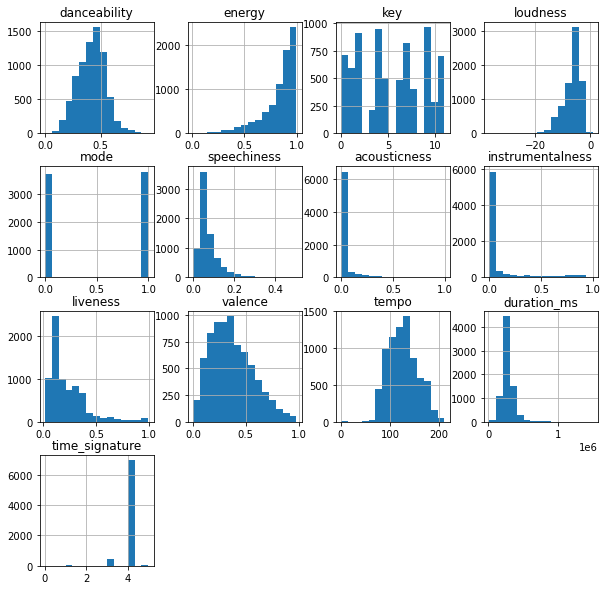

In [76]:
#look at the distribution 
tracks_with_feats_num.hist(bins=15, figsize=(10,10));

#### awareness of KMEANS restrictions 
- everything must be numerical 
- ideally similar scales for all data points

In [77]:
## reshape - state to index # not needed now

In [78]:
# arrests.index=arrests.iloc[:,0]
#index location function [:,_]

In [79]:
#keep columns 2-4
# arrests=arrests.iloc[:,1:5]

In [80]:
#delete header name for index
# arrests.rename_axis(None,inplace=True)

## Visualise to look for patterns

+ how to show 4 numerical fields in one 2d visual ? 
+ use colour and size plus two axis 

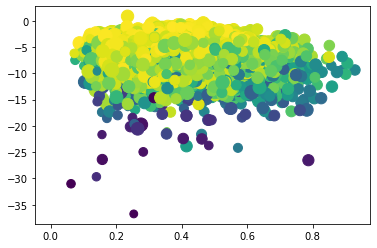

In [81]:
plt.scatter(tracks_with_feats_num.iloc[:,0],tracks_with_feats_num.iloc[:,3],tracks_with_feats_num.iloc[:,10],tracks_with_feats_num.iloc[:,1])
#x=danceability, y=loudness, size=tempo, colour=energy 

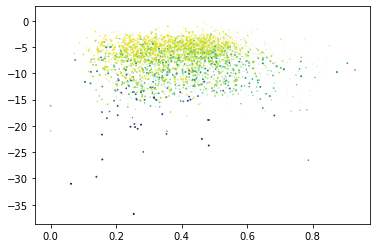

In [82]:
plt.scatter(tracks_with_feats_num.iloc[:,0],tracks_with_feats_num.iloc[:,3],tracks_with_feats_num.iloc[:,7],tracks_with_feats_num.iloc[:,1])
#x=danceability, y=loudness, size=instrumentalness, colour=energy 

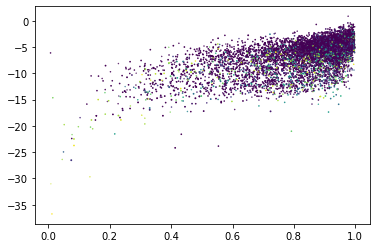

In [83]:
plt.scatter(tracks_with_feats_num.iloc[:,1], #x= energy
            tracks_with_feats_num.iloc[:,3], #y=loudness
            tracks_with_feats_num.iloc[:,0], #size=danceability
            tracks_with_feats_num.iloc[:,7]) #colour=instrumentalness  

In [84]:
tracks_with_feats_num.iloc[:,1]

0       0.668
1       0.918
2       0.701
3       0.710
4       0.824
        ...  
7519    0.867
7520    0.808
7521    0.789
7522    0.711
7523    0.975
Name: energy, Length: 7524, dtype: float64

## Scaling the data - before clustering 
+ will it make a difference 
+ we know clustering algorithms 

In [85]:
from sklearn.preprocessing import StandardScaler 

In [86]:
tracks_with_feats_df_scaled=StandardScaler().fit_transform(tracks_with_feats_num)

In [87]:
tracks_with_feats_df_scaled.shape

(7524, 13)

In [88]:
tracks_with_feats_num.columns.to_list()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [89]:
tracks_scaled=pd.DataFrame(tracks_with_feats_num,columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'])
tracks_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.001130,0.1730,0.379,162.663,167933,4
1,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.002480,0.3270,0.586,137.606,290067,4
2,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.008170,0.2670,0.519,90.157,474560,4
3,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.008110,0.0767,0.735,92.887,255200,4
4,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,354240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.427,0.867,7,-9.077,1,0.1280,0.005350,0.000846,0.0785,0.560,170.256,320627,4
7520,0.425,0.808,9,-8.376,0,0.2210,0.005340,0.179000,0.1750,0.369,92.257,216907,4
7521,0.527,0.789,9,-8.049,1,0.0694,0.014000,0.013300,0.3810,0.452,86.137,260267,4
7522,0.354,0.711,4,-10.134,0,0.1490,0.000499,0.000423,0.2450,0.518,84.268,239640,4


In [90]:
tracks_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7.524000e+03,7524.000000
mean,0.418740,0.832320,5.370149,-6.558062,0.505848,0.073704,0.048139,0.098351,0.224443,0.366637,126.642966,2.744101e+05,3.925970
std,0.123471,0.160035,3.485793,3.099607,0.499999,0.052294,0.136440,0.219909,0.176957,0.198557,28.980830,8.872771e+04,0.345835
min,0.000000,0.006670,0.000000,-36.756000,0.000000,0.000000,0.000000,0.000000,0.015100,0.000000,0.000000,8.093000e+03,0.000000
25%,0.330000,0.773000,2.000000,-8.064250,0.000000,0.039600,0.000182,0.000018,0.101750,0.213000,104.014750,2.245470e+05,4.000000
50%,0.428000,0.887000,5.000000,-5.761000,1.000000,0.056900,0.001780,0.001075,0.159000,0.340000,125.445000,2.606670e+05,4.000000
75%,0.502000,0.945000,9.000000,-4.374000,1.000000,0.088125,0.018925,0.044575,0.311000,0.497000,145.349000,3.079632e+05,4.000000
max,0.929000,0.999000,11.000000,0.878000,1.000000,0.505000,0.994000,0.994000,0.993000,0.978000,211.270000,1.505453e+06,5.000000


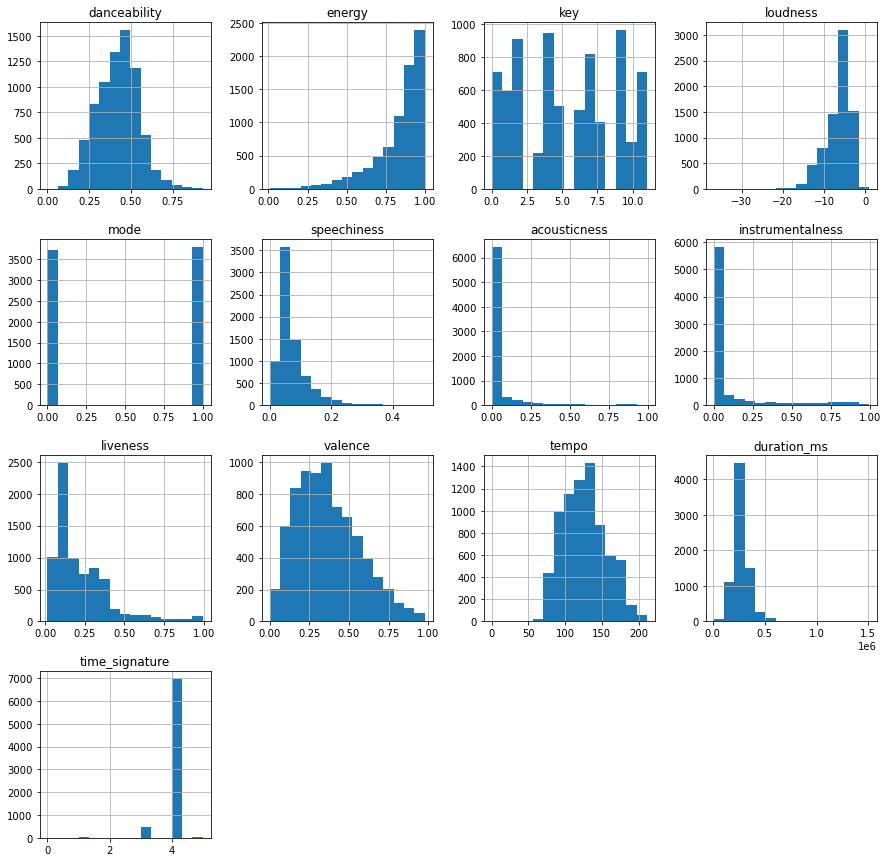

In [91]:
tracks_scaled.hist(bins=15, figsize=(15,15));

## Apply Clustering - K means

In [92]:
kmeans=KMeans(n_clusters=200)

In [93]:
cluster=kmeans.fit(tracks_scaled)

## Explore clusters 

In [94]:
cluster.cluster_centers_

array([[4.55931507e-01, 8.55876712e-01, 5.10958904e+00, ...,
        1.26087890e+02, 2.16552945e+05, 3.90410959e+00],
       [4.17363636e-01, 8.35939394e-01, 6.21212121e+00, ...,
        1.22840121e+02, 3.73628212e+05, 3.81818182e+00],
       [2.87750000e-01, 8.34500000e-01, 3.00000000e+00, ...,
        1.53133750e+02, 6.05746750e+05, 4.00000000e+00],
       ...,
       [4.11000000e-01, 8.64033333e-01, 4.73333333e+00, ...,
        1.34535133e+02, 1.71456800e+05, 3.90000000e+00],
       [4.34236111e-01, 8.62541667e-01, 4.97222222e+00, ...,
        1.24781222e+02, 2.69858403e+05, 3.95833333e+00],
       [3.81504762e-01, 7.95238095e-01, 6.00000000e+00, ...,
        1.25220952e+02, 3.71301571e+05, 3.85714286e+00]])

In [95]:
cluster.labels_

array([ 43, 111,  39, ...,  56, 165, 183])

In [96]:
#bring cluster into data frame
tracks_with_feats_num_c=tracks_scaled.copy()
tracks_with_feats_num_c['cluster']=cluster.labels_
tracks_with_feats_num_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.00113,0.1730,0.379,162.663,167933,4,43
1,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.00248,0.3270,0.586,137.606,290067,4,111
2,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.00817,0.2670,0.519,90.157,474560,4,39
3,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.00811,0.0767,0.735,92.887,255200,4,157
4,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.00432,0.0803,0.538,154.573,354240,4,171


In [97]:
tracks_with_feats_num_c["cluster"].value_counts()

155    108
157    108
44     105
67     102
36     100
      ... 
38       1
4        1
62       1
71       1
101      1
Name: cluster, Length: 200, dtype: int64

## Visually explore clusters 

In [98]:
### 2 fields at a time with cluster on colour 

In [99]:
tracks_with_feats_num_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 0 to 7523
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      7524 non-null   float64
 1   energy            7524 non-null   float64
 2   key               7524 non-null   int64  
 3   loudness          7524 non-null   float64
 4   mode              7524 non-null   int64  
 5   speechiness       7524 non-null   float64
 6   acousticness      7524 non-null   float64
 7   instrumentalness  7524 non-null   float64
 8   liveness          7524 non-null   float64
 9   valence           7524 non-null   float64
 10  tempo             7524 non-null   float64
 11  duration_ms       7524 non-null   int64  
 12  time_signature    7524 non-null   int64  
 13  cluster           7524 non-null   int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 852.3 KB


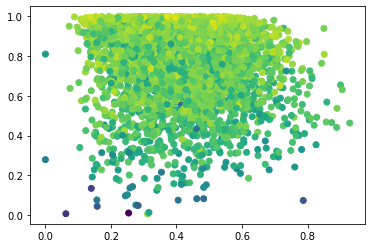

In [100]:
plt.scatter(tracks_with_feats_num_c.iloc[:,0],
            tracks_with_feats_num_c.iloc[:,1],
            c=tracks_with_feats_num_c.iloc[:,3]);
# plot 2 numeric values with the cluster to examine it 

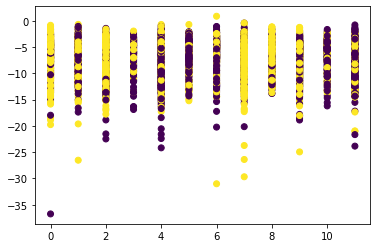

In [101]:
plt.scatter(tracks_with_feats_num_c.iloc[:,2],
            tracks_with_feats_num_c.iloc[:,3],
            c=tracks_with_feats_num_c.iloc[:,4]);

### 3 d plotting with plotly 

In [102]:
tracks_with_feats_num_c.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.418,0.668,6,-11.297,0,0.082,0.000143,0.00113,0.173,0.379,162.663,167933,4,43


In [103]:
markersize= tracks_with_feats_num_c['tempo']
markercolour= tracks_with_feats_num_c['cluster']

fig1=go.Scatter3d(x=tracks_with_feats_num_c['danceability'],
                  y=tracks_with_feats_num_c['acousticness'],
                  z=tracks_with_feats_num_c['energy'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='acousticness'),
                              zaxis=dict(title='energy')))

In [104]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

In [105]:
# save songs + features + cluster
# tracks_with_feats_num_c.to_csv('tracks_with_feats_num_c.csv')

In [106]:
tracks_cluster = tracks_with_feats_num_c

In [107]:
tracks_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.418,0.668,6,-11.297,0,0.0820,0.000143,0.001130,0.1730,0.379,162.663,167933,4,43
1,0.473,0.918,9,-3.580,1,0.0566,0.014500,0.002480,0.3270,0.586,137.606,290067,4,111
2,0.452,0.701,9,-9.534,1,0.0677,0.145000,0.008170,0.2670,0.519,90.157,474560,4,39
3,0.436,0.710,9,-5.666,1,0.0350,0.011300,0.008110,0.0767,0.735,92.887,255200,4,157
4,0.339,0.824,9,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,354240,4,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.427,0.867,7,-9.077,1,0.1280,0.005350,0.000846,0.0785,0.560,170.256,320627,4,6
7520,0.425,0.808,9,-8.376,0,0.2210,0.005340,0.179000,0.1750,0.369,92.257,216907,4,0
7521,0.527,0.789,9,-8.049,1,0.0694,0.014000,0.013300,0.3810,0.452,86.137,260267,4,56
7522,0.354,0.711,4,-10.134,0,0.1490,0.000499,0.000423,0.2450,0.518,84.268,239640,4,165


### Cluster after scaling

In [108]:
# kmeans2=KMeans(n_clusters=200)

In [109]:
# cluster_scaled2=kmeans.fit(tracks_with_feats_df_2)

In [110]:
# cluster_scaled2.cluster_centers_

In [111]:
# cluster_scaled2.labels_

In [112]:
#tracks_with_feats_df_2_c=tracks_with_feats_df_2.copy()
# tracks_with_feats_df_2_c['cluster2']=cluster_scaled2.labels_

In [113]:
#tracks_with_feats_df_2_c.head()

In [114]:
# tracks_with_feats_df_2_c['cluster2'].value_counts()

## Finding Optimal K 

In [115]:
kmeans.inertia_

3339644643.6444225

In [116]:
kmeans=KMeans(n_clusters=200)
kmeans.fit(tracks_scaled)
print(kmeans.inertia_)

3353249600.919938


In [117]:
K= range(2,30)
# whats the range of k you want to consider ? 

In [118]:
#gathering the k inertia values 
inertia = []
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(tracks_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)    

[30184051813184.85, 18568382064873.688, 12424983635792.73, 8641912043515.892, 6086508685428.833, 4640893843171.535, 3483913569077.133, 2631747552670.7075, 2044955382664.6116, 1640326400489.118, 1388534513126.1062, 1182011960456.997, 993568159828.9834, 860899445730.9438, 762688839226.5471, 686731716421.699, 629460702484.3269, 571938779434.2738, 517191917082.0089, 472358405434.28595, 423157876548.7404, 396102953014.58936, 354215361777.4181, 324477942296.0366, 300545846738.12585, 280068545112.6952, 260134066260.6331, 245743746839.49622]


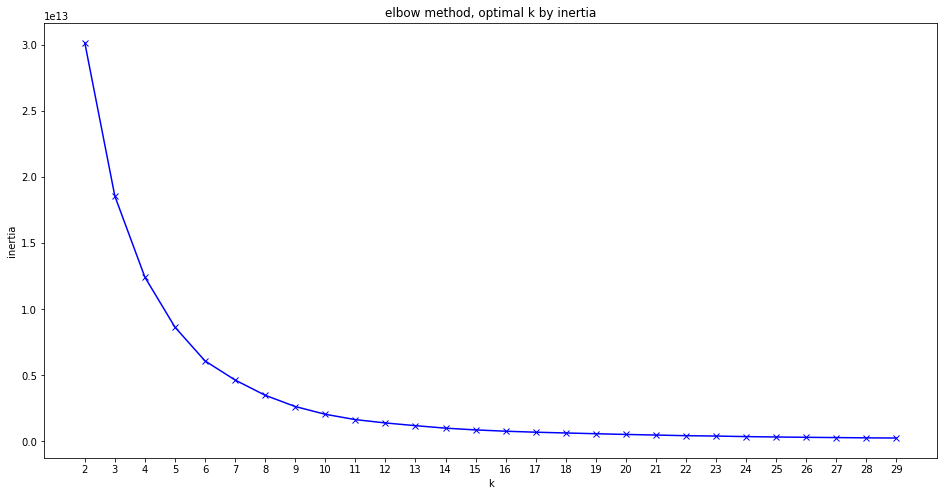

In [119]:
# plot the results 
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method, optimal k by inertia');

In [120]:
from sklearn.metrics import silhouette_score 

In [121]:
K = range(2, 30)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(tracks_scaled)
    silhouettes.append(silhouette_score(tracks_scaled, kmeans.predict(tracks_scaled)))

Text(0, 0.5, 'silhouette score')

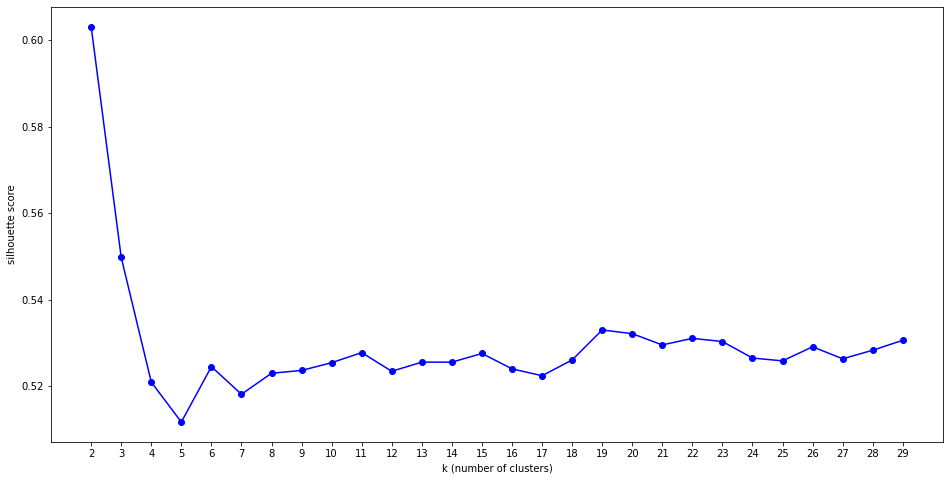

In [122]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

In [123]:
tracks_scaled.info() #scaled data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 0 to 7523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      7524 non-null   float64
 1   energy            7524 non-null   float64
 2   key               7524 non-null   int64  
 3   loudness          7524 non-null   float64
 4   mode              7524 non-null   int64  
 5   speechiness       7524 non-null   float64
 6   acousticness      7524 non-null   float64
 7   instrumentalness  7524 non-null   float64
 8   liveness          7524 non-null   float64
 9   valence           7524 non-null   float64
 10  tempo             7524 non-null   float64
 11  duration_ms       7524 non-null   int64  
 12  time_signature    7524 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 822.9 KB


In [124]:
# find a song with spotipy
findsong = 'all we are'
findsong = sp.search(q = findsong, limit = 1)
song_id = findsong['tracks']
song_id = song_id['items'][0]['id']
song_features = sp.audio_features(song_id)
song_data = pd.DataFrame(song_features, index= [0])
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.534,0.492,4,-8.905,1,0.0261,0.584,0.000001,0.185,0.328,82.465,audio_features,4SXcG6Ti32myNw9GJ9qeDt,spotify:track:4SXcG6Ti32myNw9GJ9qeDt,https://api.spotify.com/v1/tracks/4SXcG6Ti32my...,https://api.spotify.com/v1/audio-analysis/4SXc...,216933,3


In [125]:
# import libraries for clustering

from IPython.core.display import display
from IPython.display import IFrame
import random

In [126]:
#tracks_with_features_df['cluster'] = tracks_with_feats_df_2_c['cluster2'].values
#tracks_with_features_df.head() # tracks with features and clusters 2 (200 clusters)

In [127]:
song_num = song_data._get_numeric_data() # get numerical data
song_scaled = StandardScaler().fit_transform(song_num) # scale data
cluster = kmeans.predict(song_scaled) # cluster - kmeans predict
song_cluster = tracks_with_features_df.loc[tracks_cluster['cluster'] == int(cluster)] # 
song_cluster.reset_index(drop=True, inplace=True) 
song_name_id = random.choice(song_cluster["id"])
songname = sp.track(song_name_id)['name']
artist = sp.track(song_name_id)['artists'][0]['name']

def recommend(song_name_id):
    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_name_id}",
                   width="320",
                   height="80",
                   frameborder="5",
                   allowtransparency="true",
                   allow="encrypted-media",))

In [128]:
def song_cluster(song):
    song = sp.search(q = song, limit = 1)
    song_id = song['tracks']
    song_id = song_id['items'][0]['id']
    song_features = sp.audio_features(song_id)
    song_data = pd.DataFrame(song_features, index= [0])
    #song_data.head()
   
    song_num = song_data._get_numeric_data() # get numerical data
    song_scaled = StandardScaler().fit_transform(song_num) # scale data
    cluster = kmeans.predict(song_scaled) # cluster - kmeans predict
    song_cluster = tracks_with_features_df.loc[tracks_cluster['cluster'] == int(cluster)] # 
    song_cluster.reset_index(drop=True, inplace=True) 
    song_name_id = random.choice(song_cluster["id"])
    songname = sp.track(song_name_id)['name']
    artist = sp.track(song_name_id)['artists'][0]['name']
    
    def recommend(song_name_id):
        display(IFrame(src=f"https://open.spotify.com/embed/track/{song_name_id}",
                        width="320",
                        height="80",
                        frameborder="5",
                        allowtransparency="true",
                        allow="encrypted-media",))
    return print('Here you have a metal recommendation based on your search: ' + songname + ' by ' + artist), recommend(song_name_id)


In [129]:
song_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.534,0.492,4,-8.905,1,0.0261,0.584,0.000001,0.185,0.328,82.465,audio_features,4SXcG6Ti32myNw9GJ9qeDt,spotify:track:4SXcG6Ti32myNw9GJ9qeDt,https://api.spotify.com/v1/tracks/4SXcG6Ti32my...,https://api.spotify.com/v1/audio-analysis/4SXc...,216933,3


### MVP - SONG RECOMMENDER

In [130]:
# function

In [131]:
userinput = str(input("Please type a classic Metal song: ")).lower().replace(" ", '')

Please type a classic Metal song: easy on me


In [132]:
print(userinput)

easyonme


In [133]:
type(userinput)

str

In [134]:
billboard_top100.dtypes

song      object
artist    object
dtype: object

In [135]:
billboard_top100.values[:,0:2]

array([['Easy On Me', 'Adele'],
       ['Stay', 'The Kid LAROI & Justin Bieber'],
       ['Industry Baby', 'Lil Nas X & Jack Harlow'],
       ["All Too Well (Taylor's Version)", 'Taylor Swift'],
       ['Oh My God', 'Adele'],
       ['Shivers', 'Ed Sheeran'],
       ['Heat Waves', 'Glass Animals'],
       ['Bad Habits', 'Ed Sheeran'],
       ['Need To Know', 'Doja Cat'],
       ['Smokin Out The Window',
        'Silk Sonic (Bruno Mars & Anderson .Paak)'],
       ['Cold Heart (PNAU Remix)', 'Elton John & Dua Lipa'],
       ['All I Want For Christmas Is You', 'Mariah Carey'],
       ['Fancy Like', 'Walker Hayes'],
       ["Rockin' Around The Christmas Tree", 'Brenda Lee'],
       ['Good 4 U', 'Olivia Rodrigo'],
       ['Essence', 'Wizkid Featuring Justin Bieber & Tems'],
       ['Way 2 Sexy', 'Drake Featuring Future & Young Thug'],
       ['I Drink Wine', 'Adele'],
       ['You Right', 'Doja Cat & The Weeknd'],
       ['Jingle Bell Rock', 'Bobby Helms'],
       ['One Right Now', 'Post Ma

In [136]:
# .lower().replace(" ", '')
billboard_top100['song'] = billboard_top100['song'].astype(str)
billboard_top100

,song,artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,All Too Well (Taylor's Version),Taylor Swift
4,Oh My God,Adele
...,...,...
95,Too Easy,Gunna & Future
96,Escape Plan,Travis Scott
97,Who's In Your Head,Jonas Brothers
98,Jugaste y Sufri,Eslabon Armado Featuring DannyLux


In [137]:
# Check if the song  exist in DataFrame
if userinput in check_df.values:
    print('Element exists in Dataframe')
else:
    print('Element dont exists in Dataframe')
    
    # no funciona --> df column to str

Element exists in Dataframe


In [138]:
billboard_top100['song'].str.contains('Industry Baby')

0     False
1     False
2      True
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: song, Length: 100, dtype: bool

In [139]:
# check if the value is on the song and get the index value
index_user = billboard_top100.index[billboard_top100['song'].str.contains('Industry Baby') == True].tolist()
print(index_user)

[2]


In [140]:
random_song_index = index_user
random_song_index

[2]

In [141]:
# while the random index is the same as the user, select another random 
while random_song_index == index_user:
    random_song = random.choice(billboard_top100["song"])
    #random_song_index = df.index[df['song'].str.contains('Industry Baby') == True].tolist()
    print(random_song)
    break

Knowing You


In [142]:
check_df

,song,artist
0,easyonme,adele
1,stay,thekidlaroi&justinbieber
2,industrybaby,lilnasx&jackharlow
3,alltoowell(taylor'sversion),taylorswift
4,ohmygod,adele
...,...,...
95,tooeasy,gunna&future
96,escapeplan,travisscott
97,who'sinyourhead,jonasbrothers
98,jugasteysufri,eslabonarmadofeaturingdannylux


In [143]:
def song_recommender_function():

    userinput = str(input("Please type a hot song: ")).lower().replace(" ", '')

    # Check if the song  exist in billboard song
    if userinput in check_df.values:
        print('Bad news! The song is in the Billboard top 100. Do you want another billboard recommendation?')

        index_user = check_df.index[check_df['song'].str.contains(userinput) == True].tolist()
        random_song_index = index_user

        while random_song_index == index_user:
            random_song = random.choice(billboard_top100["song"])
            #random_song_index = df.index[df['song'].str.contains('Industry Baby') == True].tolist()
            print('Here is a song you may like: ', random_song)
            break

            # --------------------------
        userinput2 = str(input("Do you want another recommendation [y/n]: ")).lower().replace(" ", '')

        if userinput2 == 'y':
            print('Perfect!')
            print('Here is another song you may like: ', random_song)
            #song_recommender_function() #come back to the start point of the function

        else:
            print('Thank you for using the song recommender. Bye bye')
            
             # --------------------------
    # else
    else:
        print('Element dont exists in Dataframe')
        print('Bye bye')

In [144]:
song_recommender_function()

KeyboardInterrupt: Interrupted by user

## Improved MVP

In [160]:
# this cell is not definitive coding - is from previous versions of the function
# def inside a def (?)
def song_recommender_function():

    userinput = str(input("Please type a hot Metal song: ")).lower().replace(" ", '')

    # Check if the song  exist in DataFrame
    if userinput in check_df.values:
        print('Bad news! The song is in the Billboard top 100. Do you want another billboard recommendation?')

        index_user = check_df.index[check_df['song'].str.contains(userinput) == True].tolist()
        random_song_index = index_user

        while random_song_index == index_user:
            random_song = random.choice(billboard_top100["song"])
            #random_song_index = df.index[df['song'].str.contains('Industry Baby') == True].tolist()
            print('Here is another billboard song you may like: ', random_song.upper())
            break

            # --------------------------
        userinput2 = str(input("Do you want another recommendation [y/n]: ")).lower().replace(" ", '')

        if userinput2 == 'y':
            print('Perfect!')
            
            n = 0
            while userinput2 == 'y' and n<10: 
                random_song = random.choice(tracks_with_features_df["song_name"])
                print('Here is another song you may like: ', random_song)
                userinput2 = str(input("Do you want another recommendation [y/n]: ")).lower().replace(" ", '')
                n += 1                
            if n==10: 
                print('You have reached the maximum no of recommendations. Try again another day and thank you for using the song recommender. Bye bye')
            else:
                print('Thank you for using the song recommender. Bye bye')

            #song_recommender_function() #come back to the start point of the function
              
        else:
            print('Thank you for using the song recommender. Bye bye')
            
             # --------------------------
    # check if the song is in the metal playlist and recommend a song
    elif userinput in tracks_with_features_df.values:
        song_cluster(song)
        
        userinput3 = str(input("Do you want another metal recommendation [y/n]: ")).lower().replace(" ", '')

        if userinput3 == 'y':
            print('Perfect!')
            
            n = 0
            while userinput3 == 'y'and n<10: 
                random_song = random.choice(tracks_with_features_df["song_name"])
                song_cluster(song)
                # print('Here is another song you may like: ',song_cluster(song))
                userinput3 = str(input("Do you want another recommendation [y/n]: ")).lower().replace(" ", '')
                n += 1
            if n==10:
                print('You have reached the maximum no of recommendations. Try again another day and thank you for using the song recommender. Bye bye')
            else:
                print('Thank you for using the song recommender. Bye bye')
        
        else: 
            print('See you soon and thank you for using the song recommender. Bye bye')
        
    #check if the song is not in the playlist/billboard list so search in spotify and recommend a metal song    
    elif userinput not in tracks_with_features_df.values:
        song_cluster(song)
        
        userinput4 = str(input("Do you want a metal recommendation [y/n]: ")).lower().replace(" ", '')

        if userinput4 == 'y':
            print('Perfect!')

            n = 0
            while userinput4 == 'y' and n<10: 
                random_song = random.choice(tracks_with_features_df["song_name"])
                song_cluster(song)
                #print('Here is another song you may like: ',song_cluster(song))
                userinput4 = str(input("Do you want another recommendation [y/n]: ")).lower().replace(" ", '')
                n += 1
            if n==10: 
                print('You have reached the maximum no of recommendations. Try again another day and thank you for using the song recommender. Bye bye')
            else:
                print('Thank you for using the song recommender. Bye bye')
        
        else: 
            print('See you soon and thank you for using the song recommender. Bye bye')
        
    else:
        print('This element dont exists in our Dataframe. Try again later!')
        print('Bye bye')

In [163]:
song_recommender_function() # this is from billboard list

Please type a hot Metal song: easy on me
Bad news! The song is in the Billboard top 100. Do you want another billboard recommendation?
Here is another billboard song you may like:  HOLD ON
Do you want another recommendation [y/n]: y
Perfect!
Here is another song you may like:  into the lungs of hell - remastered
Do you want another recommendation [y/n]: n
Thank you for using the song recommender. Bye bye


In [154]:
song_recommender_function() #this is the max no of recommendations 

Please type a hot Metal song: paranoid
Here you have a metal recommendation based on your search: The Last In Line by Dio


Do you want another metal recommendation [y/n]: y
Perfect!
Here you have a metal recommendation based on your search: With All My Love by Elferya


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Killer of Giants by Ozzy Osbourne


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Indians by Anthrax


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Into the Light - live at the Orpheum by In This Moment


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Lines Of Life by Antalgia


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Lines Of Life by Antalgia


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Black Diamond - Remastered 2016 by Stratovarius


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Falling by Lacuna Coil


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Indians by Anthrax


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: In Memory by Jaded Star


Do you want another recommendation [y/n]: y
You have reached the maximum no of recommendations. Try again another day and thank you for using the song recommender. Bye bye


In [157]:
song_recommender_function()

Please type a hot Metal song: paranoid
Here you have a metal recommendation based on your search: Indians by Anthrax


Do you want another metal recommendation [y/n]: n
See you soon and thank you for using the song recommender. Bye bye


In [159]:
song_recommender_function() # this is not on the metal list (neither billboard)

Please type a hot Metal song: hey patata
Here you have a metal recommendation based on your search: Goodbye Windows by Corrosion Of Conformity


Do you want a metal recommendation [y/n]: y
Perfect!
Here you have a metal recommendation based on your search: Balls to the Wall by Accept


Here is another song you may like:  (None, None)
Do you want another recommendation [y/n]: n
Thank you for using the song recommender. Bye bye


In [161]:
song_recommender_function() # this is not on the list

Please type a hot Metal song: hey patata
Here you have a metal recommendation based on your search: Holy Diver by Dio


Do you want a metal recommendation [y/n]: y
Perfect!
Here you have a metal recommendation based on your search: The Old Guardian by Adrana


Do you want another recommendation [y/n]: n
Thank you for using the song recommender. Bye bye


In [162]:
song_recommender_function() # this is on the metal list

Please type a hot Metal song: all we are
Here you have a metal recommendation based on your search: Hollow by Lapis Lazuli


Do you want a metal recommendation [y/n]: y
Perfect!
Here you have a metal recommendation based on your search: The Old Guardian by Adrana


Do you want another recommendation [y/n]: y
Here you have a metal recommendation based on your search: Killer of Giants by Ozzy Osbourne


Do you want another recommendation [y/n]: n
Thank you for using the song recommender. Bye bye
